# Modelo de regresión lineal para la predicción de la duración de los quirófanos.
 ## Análisis del rendimiento del modelo de regresión lineal.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [58]:
# Imports necesarios
import numpy as np
from linearReg import LinearReg
import pandas as pd
import sys
sys.path.append('..\\')
import Utils.common as common
import matplotlib.pyplot as plt

In [59]:
# Leemos el listado preprocesado de datos
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_Codificado.xlsx')

In [60]:
data = common.eliminarOutliers(data)
X, Y = common.divideData(data)

In [61]:
# Usamos un método de GridSearch para encontrar los mejores parámetros para el modelo
# de regresión lineal
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# Definimos los parámetros que queremos probar
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)
# Mostramos los mejores parámetros
print(reg.best_params_)

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None}


In [62]:
# Entrenamos el modelo con los parámetros encontrados
model = LinearReg(data=X, target=Y, n_jobs=reg.best_params_['n_jobs'], fit_intercept=reg.best_params_['fit_intercept'], copy_X=reg.best_params_['copy_X'], test_size=0.2, random_state=42)

In [63]:
# Mostramos los resultados
print('MSE: ', model.getMSE())
print('R2: ', model.getR2())
print('Cross Validation MSE: ', model.getCrossValMSE())
print('Cross Validation R2: ', model.getCrossValR2())
print('Cross Validation RMSE: ', model.getCrossValRMSE())
# 

MSE:  3235.7835824673634
R2:  0.20411573339775568
Cross Validation MSE:  3461.4299997452404
Cross Validation R2:  0.14009170840473506
Cross Validation RMSE:  58.83391878623453


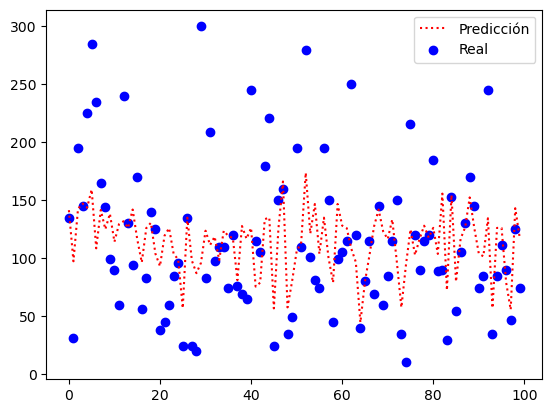

In [64]:
# Representamos gráficamente los resultados de la predicción
import matplotlib.pyplot as plt
# Seleccionamos una muestra aleatoria de 100 elementos
sample = data.sample(n=100, random_state=42)
X, Y = common.divideData(sample)
# Obtenemos las predicciones    
predictions = model.model.predict(X)
# Representamos los resultados
plt.plot(predictions, linestyle = 'dotted', color = 'red', label = 'Predicción')
x = [i for i in range(len(predictions))]
plt.scatter(x, Y, color = 'blue', label = 'Real')
plt.legend()
plt.show()

In [65]:
# Exportamos el modelo a un fichero
model.exportModel('linearRegModel.pkl')

In [66]:
# Cargamos los datos del dataset ampliado
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_PLASTICA_Codificado.xlsx')
data = common.eliminarOutliers(data)
X, Y = common.divideDataAmpli(data)

c:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Modelos\Lineales\..\Utils\common.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Código diagnóstico'] = data['Código diagnóstico'].astype(float)


In [67]:
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [68]:
# Entrenamos el modelo con los parámetros encontrados
model_plastica = LinearReg(data=X, target=Y, n_jobs=reg.best_params_['n_jobs'], fit_intercept=reg.best_params_['fit_intercept'], copy_X=reg.best_params_['copy_X'], test_size=0.2, random_state=42)

In [69]:
# Mostramos los resultados
print('MSE: ', model_plastica.getMSE())
print('R2: ', model_plastica.getR2())
print('Cross Validation MSE: ', model_plastica.getCrossValMSE())
print('Cross Validation R2: ', model_plastica.getCrossValR2())
print('Cross Validation RMSE: ', model_plastica.getCrossValRMSE())

MSE:  1966.561208915276
R2:  0.40574202912485724
Cross Validation MSE:  2097.6196992281884
Cross Validation R2:  0.3712610469926896
Cross Validation RMSE:  45.799778375317366


c:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Modelos\Lineales\..\Utils\common.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Código diagnóstico'] = data['Código diagnóstico'].astype(float)


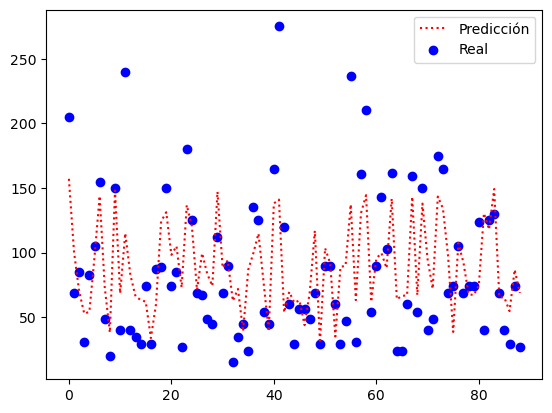

In [70]:
# Representamos gráficamente los resultados de la predicción
sample = data.sample(n=100, random_state=42)
X, Y = common.divideDataAmpli(sample)
# Obtenemos las predicciones    
predictions = model_plastica.model.predict(X)
# Representamos los resultados
plt.plot(predictions, linestyle = 'dotted', color = 'red', label = 'Predicción')
x = [i for i in range(len(predictions))]
plt.scatter(x, Y, color = 'blue', label = 'Real')
plt.legend()
plt.show()

In [71]:
# Lo exportamos a un fichero
model.exportModel('linearRegModel_PLASTICA.pkl')